First 5 rows of the dataset:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Chair,West,250.0,45.0,0.10,Furniture,15-01-2023
1,Table,East,300.0,60.0,0.20,Furniture,16-01-2023
2,Laptop,East,1200.0,200.0,0.00,Technology,17-01-2023
3,Monitor,South,450.0,70.0,0.05,Technology,18-01-2023
4,Printer,North,200.0,30.0,0.15,Technology,19-01-2023



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   11 non-null     object 
 1   Region    11 non-null     object 
 2   Sales     11 non-null     float64
 3   Profit    11 non-null     float64
 4   Discount  11 non-null     float64
 5   Category  12 non-null     object 
 6   Date      12 non-null     object 
dtypes: float64(3), object(4)
memory usage: 804.0+ bytes

Statistical Summary:


,Sales,Profit,Discount
count,11.000000,11.000000,11.000000
mean,600.000000,99.545455,0.090909
std,420.713679,71.744496,0.073547
min,200.000000,30.000000,0.000000
25%,250.000000,45.000000,0.025000
50%,450.000000,60.000000,0.100000
75%,1000.000000,175.000000,0.125000
max,1200.000000,200.000000,0.200000


Number of duplicate rows: 4
Missing values before cleaning:
Product     1
Region      1
Sales       1
Profit      1
Discount    1
Category    0
Date        0
dtype: int64
Missing values after cleaning:
Product     1
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Data after cleaning:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Chair,West,250.0,45.0,0.10,Furniture,2023-01-15
1,Table,East,300.0,60.0,0.20,Furniture,2023-01-16
2,Laptop,East,1200.0,200.0,0.00,Technology,2023-01-17
3,Monitor,South,450.0,70.0,0.05,Technology,2023-01-18
4,Printer,North,200.0,30.0,0.15,Technology,2023-01-19


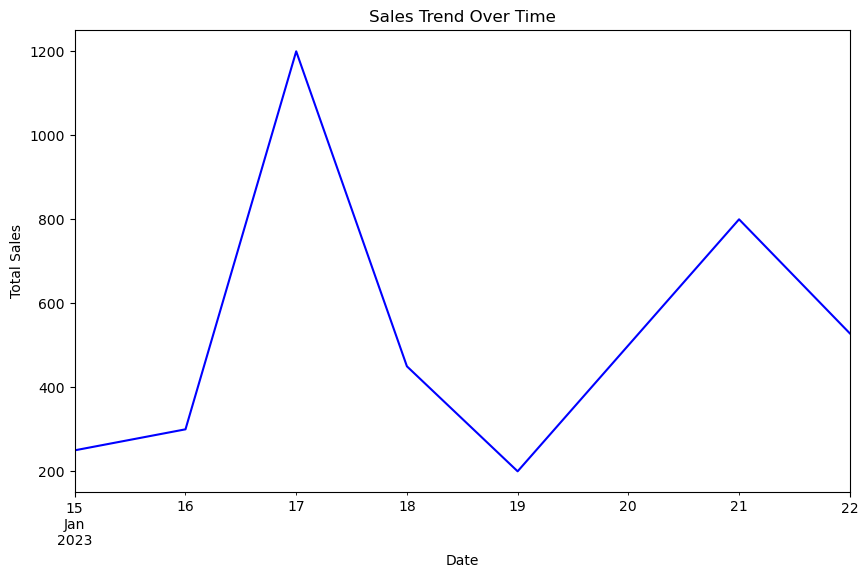

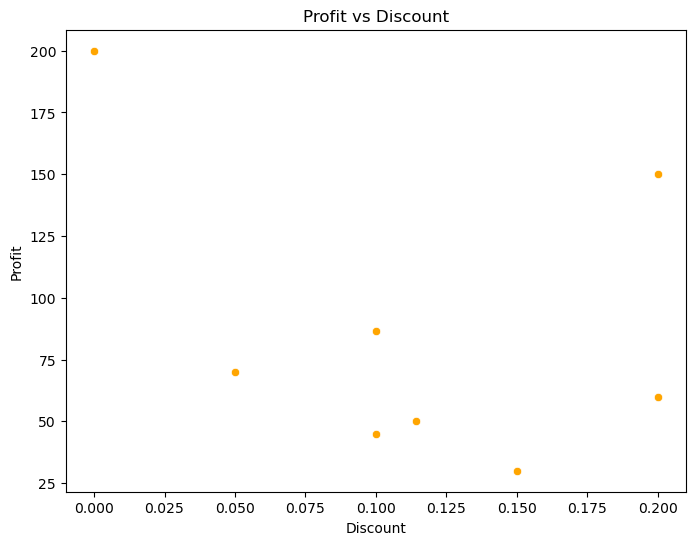

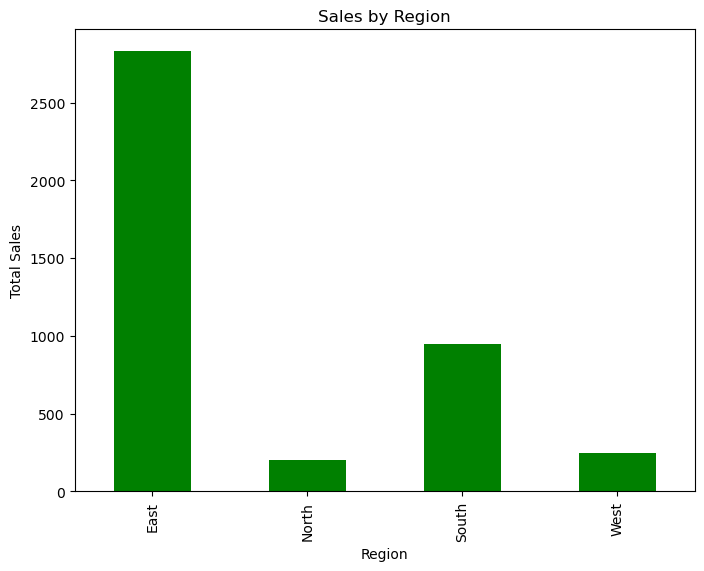

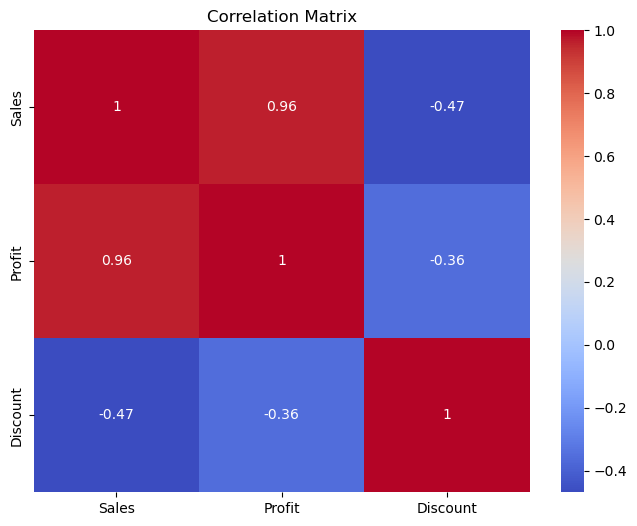

Mean Squared Error: 2951.82
R-squared Score: 0.70


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\New folder\\sales_data.csv")



# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# Fill missing numerical values with column mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Fix for Region (categorical)
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

# Fix for Date (datetime)
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])

print(f"Missing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Verify the changes
print("\nData after cleaning:")
display(df.head())

# Plot sales trends over time
plt.figure(figsize=(10,6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by region
plt.figure(figsize=(8,6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Machine Learning - Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Profit', 'Discount']]
Y = df['Sales']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"R-squared Score: {r2_score(Y_test, Y_pred):.2f}")
